# KNN

In [1]:
import pandas as pd

houses = pd.DataFrame({
        'rooms': [2, 1],
        'bathrooms': [1, 1],
        'stove': ['gas', 'electric'],
        'heat': ['radiator', 'radiator'],
})

print 'Jacard Distance', 2.0/ 6

houses

Jacard Distance 0.333333333333


,bathrooms,heat,rooms,stove
0,1,radiator,2,gas
1,1,radiator,1,electric


In [2]:
houses = pd.DataFrame({
        'rooms': [2, 1],
        'bathrooms': [1, 1],
        'stove': ['gas', 'electric'],
        'heat': ['electric', 'radiator'],
})

print 'Jacard Distance', 1.0/ 7

houses

Jacard Distance 0.142857142857


,bathrooms,heat,rooms,stove
0,1,electric,2,gas
1,1,radiator,1,electric


#Minkowski distance
- Manhattan (P=1)
- Euclidian (P=2)
- For continuous data

In [5]:
import pandas as pd
from sklearn import cross_validation
df = pd.read_csv("/Users/Ikkei/data-analysis/DAT18NYC/data/credit-data-post-import.csv")

train, test = cross_validation.train_test_split(df)
train = pd.DataFrame(train, columns=df.columns)
test = pd.DataFrame(test, columns=df.columns)

In [6]:
df.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


In [7]:
train_w_monthly_income = train[train.monthly_income.isnull()==False]
train_w_null_monthly_income = train[train.monthly_income.isnull()==True]

In [11]:
corr = train_w_monthly_income.corr()
corr.monthly_income.order(ascending=False)

monthly_income                                 1.000000
number_real_estate_loans_or_lines              0.168479
number_of_open_credit_lines_and_loans          0.121499
number_of_dependents                           0.077921
age                                            0.049984
revolving_utilization_of_unsecured_lines       0.009689
number_of_time30-59_days_past_due_not_worse   -0.013333
number_of_time60-89_days_past_due_not_worse   -0.014713
number_of_times90_days_late                   -0.016898
serious_dlqin2yrs                             -0.025930
debt_ratio                                    -0.039575
Name: monthly_income, dtype: float64

In [14]:
from sklearn.neighbors import KNeighborsRegressor

cols = ['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']

# Manhattan
income_imputer = KNeighborsRegressor(n_neighbors=1, p=2)
income_imputer.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income)

# fill in the missing data with the imputed values!
train_w_null_monthly_income['monthly_income'] = income_imputer.predict(train_w_null_monthly_income[cols])

test['monthly_income_imputed'] = income_imputer.predict(test[cols])
test[['monthly_income', 'monthly_income_imputed']].head()

/Users/Ikkei/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,monthly_income,monthly_income_imputed
0,4157,4675
1,2300,1600
2,4000,10500
3,NaN,15000
4,5300,4530


In [15]:
# Euclidian
income_imputer = KNeighborsRegressor(n_neighbors=2, p=2)
income_imputer.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income)

# fill in the missing data with the imputed values!
train_w_null_monthly_income['monthly_income'] = income_imputer.predict(train_w_null_monthly_income[cols])

test['monthly_income_imputed'] = income_imputer.predict(test[cols])
test[['monthly_income', 'monthly_income_imputed']].head()

/Users/Ikkei/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,monthly_income,monthly_income_imputed
0,4157,3337.5
1,2300,3850.0
2,4000,9202.0
3,NaN,9729.0
4,5300,3164.5


In [19]:
from sklearn import grid_search

imputer = KNeighborsRegressor()

param1 = {'p': (1, 2), 'n_neighbors': range(1, 23, 3)}

regr = grid_search.GridSearchCV(imputer, param1, scoring='mean_squared_error')
regr.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income)

GridSearchCV(cv=None,
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'p': (1, 2), 'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_squared_error', verbose=0)

In [20]:
param2 = {'metric': ['jaccard'], 'n_neighbors': range(1, 23, 3)}
jac = grid_search.GridSearchCV(imputer, param2, scoring='mean_squared_error')
jac.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income)

GridSearchCV(cv=None,
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22], 'metric': ['jaccard']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_squared_error', verbose=0)

In [21]:
#----------Minkowski Grid Search-------------
for score in regr.grid_scores_:
    print score

print regr.best_estimator_

mean: -131244369.32389, std: 41779639.27145, params: {'n_neighbors': 1, 'p': 1}
mean: -131340632.13202, std: 41646900.23095, params: {'n_neighbors': 1, 'p': 2}
mean: -119063262.25159, std: 38696813.16814, params: {'n_neighbors': 4, 'p': 1}
mean: -119111981.06754, std: 38751859.49940, params: {'n_neighbors': 4, 'p': 2}
mean: -115987351.27558, std: 39729009.22560, params: {'n_neighbors': 7, 'p': 1}
mean: -116019109.80879, std: 39745867.67363, params: {'n_neighbors': 7, 'p': 2}
mean: -114722563.27760, std: 40001156.92535, params: {'n_neighbors': 10, 'p': 1}
mean: -114634767.91101, std: 39916698.11985, params: {'n_neighbors': 10, 'p': 2}
mean: -114059472.79262, std: 39875424.89811, params: {'n_neighbors': 13, 'p': 1}
mean: -114061697.37486, std: 39864440.60970, params: {'n_neighbors': 13, 'p': 2}
mean: -113574217.74649, std: 40016224.79118, params: {'n_neighbors': 16, 'p': 1}
mean: -113525196.47714, std: 40065938.86933, params: {'n_neighbors': 16, 'p': 2}
mean: -113151571.48648, std: 39867

In [22]:
# ----------Jaccard Grid Search-------------
for score in jac.grid_scores_:
    print score

print jac.best_estimator_

mean: -129149203.64691, std: 42618158.03527, params: {'n_neighbors': 1, 'metric': 'jaccard'}
mean: -118498056.13253, std: 42768930.15431, params: {'n_neighbors': 4, 'metric': 'jaccard'}
mean: -117283326.53211, std: 40371065.63962, params: {'n_neighbors': 7, 'metric': 'jaccard'}
mean: -118417643.06730, std: 40901624.01751, params: {'n_neighbors': 10, 'metric': 'jaccard'}
mean: -117932518.80002, std: 40649399.07614, params: {'n_neighbors': 13, 'metric': 'jaccard'}
mean: -118701294.49783, std: 40960399.65686, params: {'n_neighbors': 16, 'metric': 'jaccard'}
mean: -119006264.86321, std: 40939557.47570, params: {'n_neighbors': 19, 'metric': 'jaccard'}
mean: -120308384.30074, std: 41345362.24282, params: {'n_neighbors': 22, 'metric': 'jaccard'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='jaccard',
          metric_params=None, n_neighbors=7, p=2, weights='uniform')


In [37]:
from sklearn import grid_search, datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()

param = {'p': [2], 'n_neighbors':range(1, 100)}
knn = KNeighborsClassifier()
clf = grid_search.GridSearchCV(knn, param, scoring='accuracy')
clf.fit(iris.data, iris.target)

GridSearchCV(cv=None,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'p': [2], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

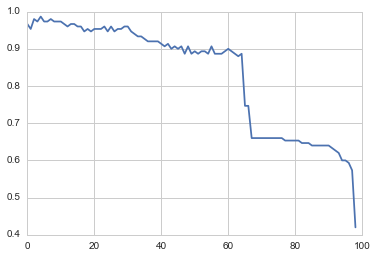

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

scores = [i.mean_validation_score for i in clf.grid_scores_]

sns.set_style('whitegrid')
plt.plot(scores)

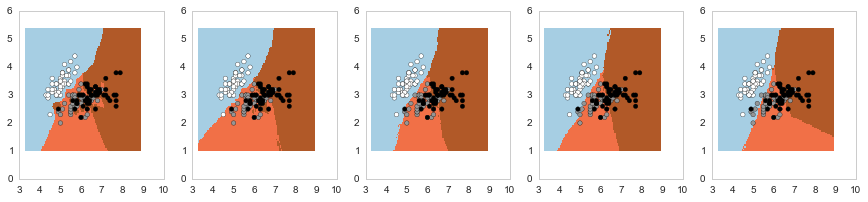

In [48]:
import numpy as np

def plot_estimator(est, X, y, ax, pos):
    est.fit(X, y)
    x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # perform classification on our samples
    z = est.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = z.reshape(xx.shape)
    ax[pos].pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    # Lets plot our sample points
    ax[pos].scatter(X[:,0], X[:,1], c=y)
    

fig, ax = plt.subplots(1, 5, figsize=[15, 3])

for e, k in enumerate([1, 5, 40, 60, 100]):
    plot_estimator(KNeighborsClassifier(n_neighbors=k), iris.data[:, :2], iris.target, ax, e)

#Beer Clustering

In [50]:
beer = pd.read_csv("/Users/Ikkei/data-analysis/DAT18NYC/data/beer.txt", sep=r'\s')
beer.head()

,Beer,Calories,Sodium,Alcohol,Cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


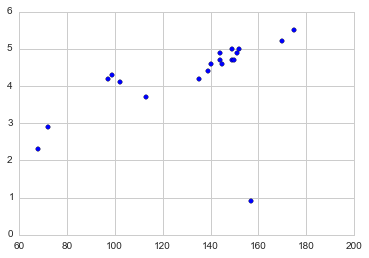

In [51]:
plt.scatter(beer.Calories, beer.Alcohol)

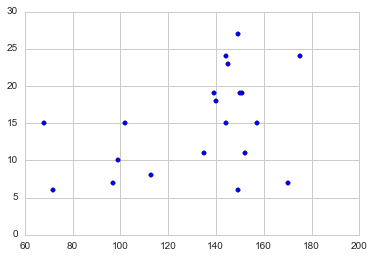

In [52]:
plt.scatter(beer.Calories, beer.Sodium)

In [66]:
from sklearn import  cluster

sepal_data = iris.data[:, :2] # just use 2 features
krange = range(1, sepal_data.shape[0] / 2)

# Sum of distances of samples to their closest cluster center.
sum_squares = [cluster.KMeans(n_clusters=k).fit(sepal_data).inertia_ for k in krange]
variance_explained = [1.0 - (s / sum(sum_squares)) for s in sum_squares]

(1, 75)

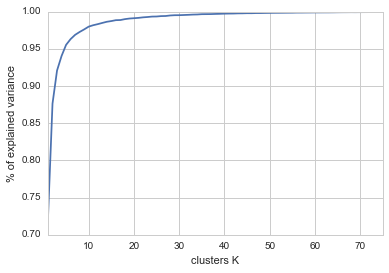

In [71]:
plt.figure()
plt.plot(range(1, 75), variance_explained)
plt.ylabel('% of explained variance')
plt.xlabel('clusters K')
plt.xlim([1, 75])

(1, 11)

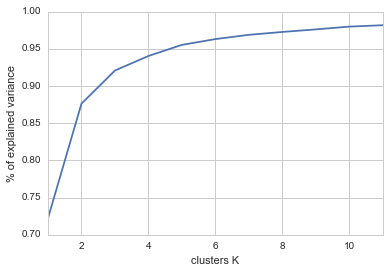

In [72]:
plt.figure()
plt.plot(range(1, 12), variance_explained[:11])
plt.ylabel('% of explained variance')
plt.xlabel('clusters K')
plt.xlim([1, 11])

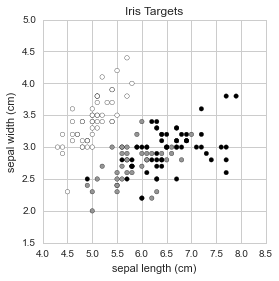

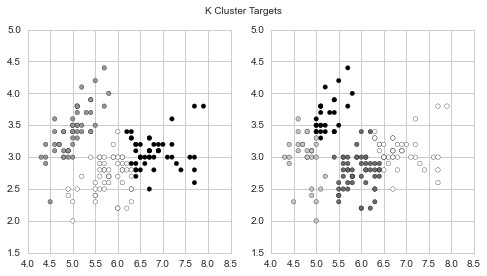

In [85]:
# Actual
plt.figure(figsize=[4,4])
plt.scatter(sepal_data[:,0], sepal_data[:,1], c=iris.target)
plt.title('Iris Targets')
plt.ylabel(iris.feature_names[1])
plt.xlabel(iris.feature_names[0])

# 3 Clusters
cluster_3 = cluster.KMeans(n_clusters=3).fit(sepal_data)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
fig.suptitle('K Cluster Targets')
# ax[0].scatter(sepal_data[:, 0], sepal_data[:, 1], c=cluster_3.predict(sepal_data)
ax[0].scatter(sepal_data[:, 0], sepal_data[:, 1], c=clusters_3.predict(sepal_data))

clusters_4 = cluster.KMeans(n_clusters=4).fit(sepal_data)
ax[1].scatter(sepal_data[:, 0], sepal_data[:, 1], c=clusters_4.predict(sepal_data))

In [88]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth=2, random_state=1)
tree_clf.fit(sepal_data, clusters_3.predict(sepal_data))

with open("iris_clusters.dot", 'wb') as f:
    f = tree.export_graphviz(tree_clf, out_file=f, feature_names=iris.feature_names[:3])

dot -Tpng iris_clusters.dot -o iris_clusters.png
<img src='iris_clusters.png'>